# German Credit Dataset analysis using Aequitas

In [1]:
pip install aequitas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install aif360

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot
import aequitas.plot as ap

# import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [4]:
## loading the dataset through API 
from aif360.datasets import GermanDataset

german_dataset = GermanDataset()

dfgerman = pd.DataFrame(german_dataset.convert_to_dataframe()[0])
# remove labels
dfgerman = dfgerman.drop(columns=german_dataset.label_names)
dfgerman['label'] = tuple(german_dataset.labels[:, 0])

dfgerman

,month,credit_amount,investment_as_income_percentage,residence_since,age,number_of_credits,people_liable_for,sex,status=A11,status=A12,...,housing=A153,skill_level=A171,skill_level=A172,skill_level=A173,skill_level=A174,telephone=A191,telephone=A192,foreign_worker=A201,foreign_worker=A202,label
0,6.0,1169.0,4.0,4.0,1.0,2.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,48.0,5951.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0
2,12.0,2096.0,2.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,42.0,7882.0,2.0,4.0,1.0,1.0,2.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,24.0,4870.0,3.0,4.0,1.0,2.0,2.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
996,30.0,3857.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
997,12.0,804.0,4.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
998,45.0,1845.0,4.0,4.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0


In [8]:
## with Pandas
## Point to the folder where you put the data file, like this:
filepath = "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/aif360/data/raw/german/german.data"


column_names = ['status', 'month', 'credit_history',
    'purpose', 'credit_amount', 'savings', 'employment',
    'investment_as_income_percentage', 'personal_status',
    'other_debtors', 'residence_since', 'property', 'age',
    'installment_plans', 'housing', 'number_of_credits',
    'skill_level', 'people_liable_for', 'telephone',
    'foreign_worker', 'credit']
na_values=[]

german_df = pd.read_csv(filepath, sep=' ', header=None, names=column_names,
                     na_values=na_values)
german_df.shape

(1000, 21)

In [9]:
german_df.head()


,status,month,credit_history,purpose,credit_amount,savings,employment,investment_as_income_percentage,personal_status,other_debtors,...,property,age,installment_plans,housing,number_of_credits,skill_level,people_liable_for,telephone,foreign_worker,credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## Exploring the German Dataset

In [10]:
## mapping age 1 >=25
german_df['age_mapped'] = german_df['age'].apply(lambda x: 'older' if x>=25 else 'younger')
german_df.head()

,status,month,credit_history,purpose,credit_amount,savings,employment,investment_as_income_percentage,personal_status,other_debtors,...,age,installment_plans,housing,number_of_credits,skill_level,people_liable_for,telephone,foreign_worker,credit,age_mapped
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,1,older
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,2,younger
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,1,older
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,1,older
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,2,older


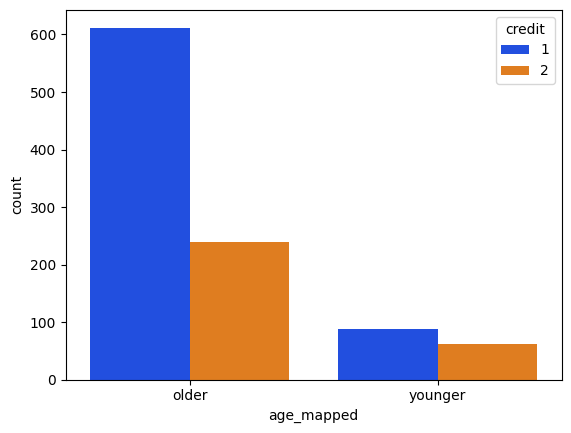

In [11]:
by_age = sns.countplot(x="age_mapped", hue="credit", data=german_df, palette="bright")


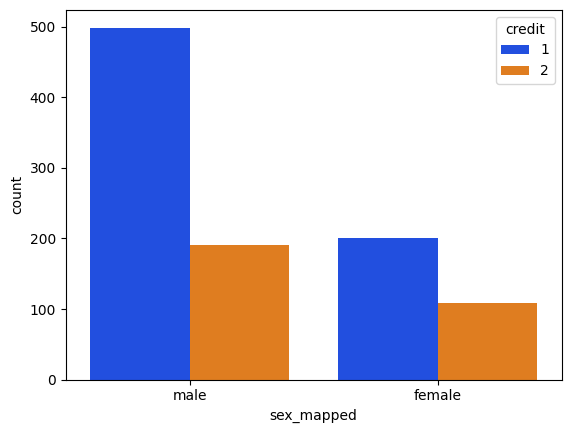

In [12]:
# A91 : male : divorced/separated
# A92 : female : divorced/separated/married
# A93 : male : single
# A94 : male : married/widowed
# A95 : female : single 
malecat = ['A91','A93','A94']
german_df['sex_mapped'] = german_df['personal_status'].apply(lambda x: "male" if x in malecat else "female")

by_sex = sns.countplot(x="sex_mapped", hue="credit", data=german_df, palette="bright")

## Using Aequitas to audit the dataset

Before the dta can be used with aequitas it requies preprocessing The input dataframe must comtain score for labels and categories must be strings For detailed requirements check https://github.com/dssg/aequitas#input-data

In [13]:
german_df = german_df.rename(columns={'credit':'label_value'}) ## label is the machine original label value


In [14]:
#trying SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

svcClf =  make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))

german_x = german_df.drop('label_value',  axis=1)
german_y = german_df['label_value']

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(german_x)
german_x = enc.transform(german_x)

german_x_train,german_x_test, german_y_train, german_y_test = train_test_split(german_x, german_y, test_size = 0.33)

svcClf = svcClf.fit(german_x_train,german_y_train)

svc_score = svcClf.predict(german_x)
svcClf.score(german_x_test,german_y_test)

0.7151515151515152

In [15]:
german_df['score'] = svc_score ## score is the machine learning scoring


In [16]:
german_df.dtypes


status                             object
month                               int64
credit_history                     object
purpose                            object
credit_amount                       int64
savings                            object
employment                         object
investment_as_income_percentage     int64
personal_status                    object
other_debtors                      object
residence_since                     int64
property                           object
age                                 int64
installment_plans                  object
housing                            object
number_of_credits                   int64
skill_level                        object
people_liable_for                   int64
telephone                          object
foreign_worker                     object
label_value                         int64
age_mapped                         object
sex_mapped                         object
score                             

In [17]:
import aequitas.preprocessing 
# *input_data* matches CLI input data norms.
processed_german_df, _ = aequitas.preprocessing.preprocess_input_df(german_df)

In [18]:
## ## Define Attributes to Audit and Reference Group for each Attribute 
attributes_and_reference_groups={'age_mapped':'older', 'sex_mapped':'male'}
attributes_to_audit = list(attributes_and_reference_groups.keys())

In [19]:
#define the metrics
metrics = ['fpr']
disparity_tolerance = 1.30

In [20]:
processed_german_df

,status,month,credit_history,purpose,credit_amount,savings,employment,investment_as_income_percentage,personal_status,other_debtors,...,housing,number_of_credits,skill_level,people_liable_for,telephone,foreign_worker,label_value,age_mapped,sex_mapped,score
0,A11,4.00-12.00,A34,A43,250.00-1365.50,A65,A75,3.00-4.00,A93,A101,...,A152,1.00-2.00,A173,1.00-2.00,A192,A201,1,older,male,1
1,A12,24.00-72.00,A32,A43,3972.25-18424.00,A61,A73,1.00-2.00,A92,A101,...,A152,1.00-2.00,A173,1.00-2.00,A191,A201,2,younger,female,1
2,A14,4.00-12.00,A34,A46,1365.50-2319.50,A61,A74,1.00-2.00,A93,A101,...,A152,1.00-2.00,A172,1.00-2.00,A191,A201,1,older,male,1
3,A11,24.00-72.00,A32,A42,3972.25-18424.00,A61,A74,1.00-2.00,A93,A103,...,A153,1.00-2.00,A173,1.00-2.00,A191,A201,1,older,male,1
4,A11,18.00-24.00,A33,A40,3972.25-18424.00,A61,A73,2.00-3.00,A93,A101,...,A153,1.00-2.00,A173,1.00-2.00,A191,A201,2,older,male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,4.00-12.00,A32,A42,1365.50-2319.50,A61,A74,2.00-3.00,A92,A101,...,A152,1.00-2.00,A172,1.00-2.00,A191,A201,1,older,female,1
996,A11,24.00-72.00,A32,A41,2319.50-3972.25,A61,A73,3.00-4.00,A91,A101,...,A152,1.00-2.00,A174,1.00-2.00,A192,A201,1,older,male,1
997,A14,4.00-12.00,A32,A43,250.00-1365.50,A61,A75,3.00-4.00,A93,A101,...,A152,1.00-2.00,A173,1.00-2.00,A191,A201,1,older,male,1
998,A11,24.00-72.00,A32,A43,1365.50-2319.50,A61,A73,3.00-4.00,A93,A101,...,A153,1.00-2.00,A173,1.00-2.00,A192,A201,2,younger,male,2


In [21]:
new_preprocessed_german = processed_german_df
new_preprocessed_german['label_value'] = new_preprocessed_german['label_value'].replace(1,0)
new_preprocessed_german['label_value'] = new_preprocessed_german['label_value'].replace(2,1)

new_preprocessed_german['score'] = new_preprocessed_german['score'].replace(1,0)
new_preprocessed_german['score'] = new_preprocessed_german['score'].replace(2,1)

In [22]:
## Running qequitas 

# Initialize Aequitas
g = Group()
b = Bias()

# get_crosstabs returns a dataframe of the group counts and group value bias metrics.
xtab, _ = g.get_crosstabs(new_preprocessed_german, attr_cols=attributes_to_audit)
bdf = b.get_disparity_predefined_groups(xtab, original_df=new_preprocessed_german, ref_groups_dict=attributes_and_reference_groups)


get_disparity_predefined_group()


In [23]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [24]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,195,age_mapped,older,153,698,1,87,611,152,239,612,851,1000
1,0,binary 0/1,195,age_mapped,younger,42,107,1,20,87,41,61,88,149,1000
2,0,binary 0/1,195,sex_mapped,female,70,240,1,40,200,69,109,201,310,1000
3,0,binary 0/1,195,sex_mapped,male,125,565,1,67,498,124,191,499,690,1000


In [25]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,age_mapped,older,0.64,1.00,0.12,0.01,0.00,0.36,0.88,0.99,0.78,0.18,0.28
1,age_mapped,younger,0.67,0.99,0.19,0.02,0.01,0.33,0.81,0.98,0.22,0.28,0.41
2,sex_mapped,female,0.63,1.00,0.17,0.01,0.00,0.37,0.83,0.99,0.36,0.23,0.35
3,sex_mapped,male,0.65,1.00,0.12,0.01,0.00,0.35,0.88,0.99,0.64,0.18,0.28


In [26]:
bdf

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,195,age_mapped,older,0.635983,0.998366,0.124642,0.006536,0.001634,...,older,older,older,older,older,older,older,older,older,older
1,0,binary 0/1,195,age_mapped,younger,0.672131,0.988636,0.186916,0.023810,0.011364,...,older,older,older,older,older,older,older,older,older,older
2,0,binary 0/1,195,sex_mapped,female,0.633028,0.995025,0.166667,0.014286,0.004975,...,male,male,male,male,male,male,male,male,male,male
3,0,binary 0/1,195,sex_mapped,male,0.649215,0.997996,0.118584,0.008000,0.002004,...,male,male,male,male,male,male,male,male,male,male


In [27]:
bdf.style

,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value
0,0,binary 0/1,195,age_mapped,older,0.635983,0.998366,0.124642,0.006536,0.001634,0.364017,0.875358,0.993464,153,698,0.784615,0.179788,1,87,611,152,239,612,851,1000,0.280846,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,older,older,older,older,older,older,older,older,older,older
1,0,binary 0/1,195,age_mapped,younger,0.672131,0.988636,0.186916,0.023810,0.011364,0.327869,0.813084,0.976190,42,107,0.215385,0.281879,1,20,87,41,61,88,149,1000,0.409396,0.274510,1.567838,0.982613,3.642857,1.499624,6.954545,0.900697,1.056838,0.990254,0.928859,older,older,older,older,older,older,older,older,older,older
2,0,binary 0/1,195,sex_mapped,female,0.633028,0.995025,0.166667,0.014286,0.004975,0.366972,0.833333,0.985714,70,240,0.358974,0.225806,1,40,200,69,109,201,310,1000,0.351613,0.560000,1.246452,0.993664,1.785714,1.405473,2.482587,1.046145,0.975067,0.997023,0.945448,male,male,male,male,male,male,male,male,male,male
3,0,binary 0/1,195,sex_mapped,male,0.649215,0.997996,0.118584,0.008000,0.002004,0.350785,0.881416,0.992000,125,565,0.641026,0.181159,1,67,498,124,191,499,690,1000,0.276812,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,male,male,male,male,male,male,male,male,male,male


In [28]:
calculated_disparities = b.list_disparities(bdf)

In [29]:
# View disparity metrics added to dataframe
bdf[['attribute_name', 'attribute_value'] +  calculated_disparities]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,age_mapped,older,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,age_mapped,younger,0.27451,1.567838,0.982613,3.642857,1.499624,6.954545,0.900697,1.056838,0.990254,0.928859
2,sex_mapped,female,0.56000,1.246452,0.993664,1.785714,1.405473,2.482587,1.046145,0.975067,0.997023,0.945448
3,sex_mapped,male,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
bdf[['attribute_name', 'attribute_value'] +
     b.list_disparities(bdf)].style

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,age_mapped,older,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,age_mapped,younger,0.274510,1.567838,0.982613,3.642857,1.499624,6.954545,0.900697,1.056838,0.990254,0.928859
2,sex_mapped,female,0.560000,1.246452,0.993664,1.785714,1.405473,2.482587,1.046145,0.975067,0.997023,0.945448
3,sex_mapped,male,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
f = Fairness()

In [35]:
f = Fairness()
fairness_df = f.get_group_value_fairness(bdf)
fairness_df


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,...,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,195,age_mapped,older,0.635983,0.998366,0.124642,0.006536,0.001634,...,True,True,True,True,True,True,True,True,True,True
1,0,binary 0/1,195,age_mapped,younger,0.672131,0.988636,0.186916,0.023810,0.011364,...,True,True,True,True,True,False,False,False,False,False
2,0,binary 0/1,195,sex_mapped,female,0.633028,0.995025,0.166667,0.014286,0.004975,...,True,True,True,True,True,False,False,False,False,False
3,0,binary 0/1,195,sex_mapped,male,0.649215,0.997996,0.118584,0.008000,0.002004,...,True,True,True,True,True,True,True,True,True,True


In [41]:
parity_results_df = f.get_group_value_fairness(bdf)
parity_columns = [col for col in parity_results_df.columns if 'Parity' in col]
final_parity_table = parity_results_df[['attribute_name', 'attribute_value'] + parity_columns]
final_parity_table

,attribute_name,attribute_value,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity
0,age_mapped,older,True,True,True,True,True,True,True,True,True,True,True,True
1,age_mapped,younger,False,False,False,False,False,True,True,True,True,True,False,False
2,sex_mapped,female,False,True,False,False,False,True,True,True,True,True,False,False
3,sex_mapped,male,True,True,True,True,True,True,True,True,True,True,True,True


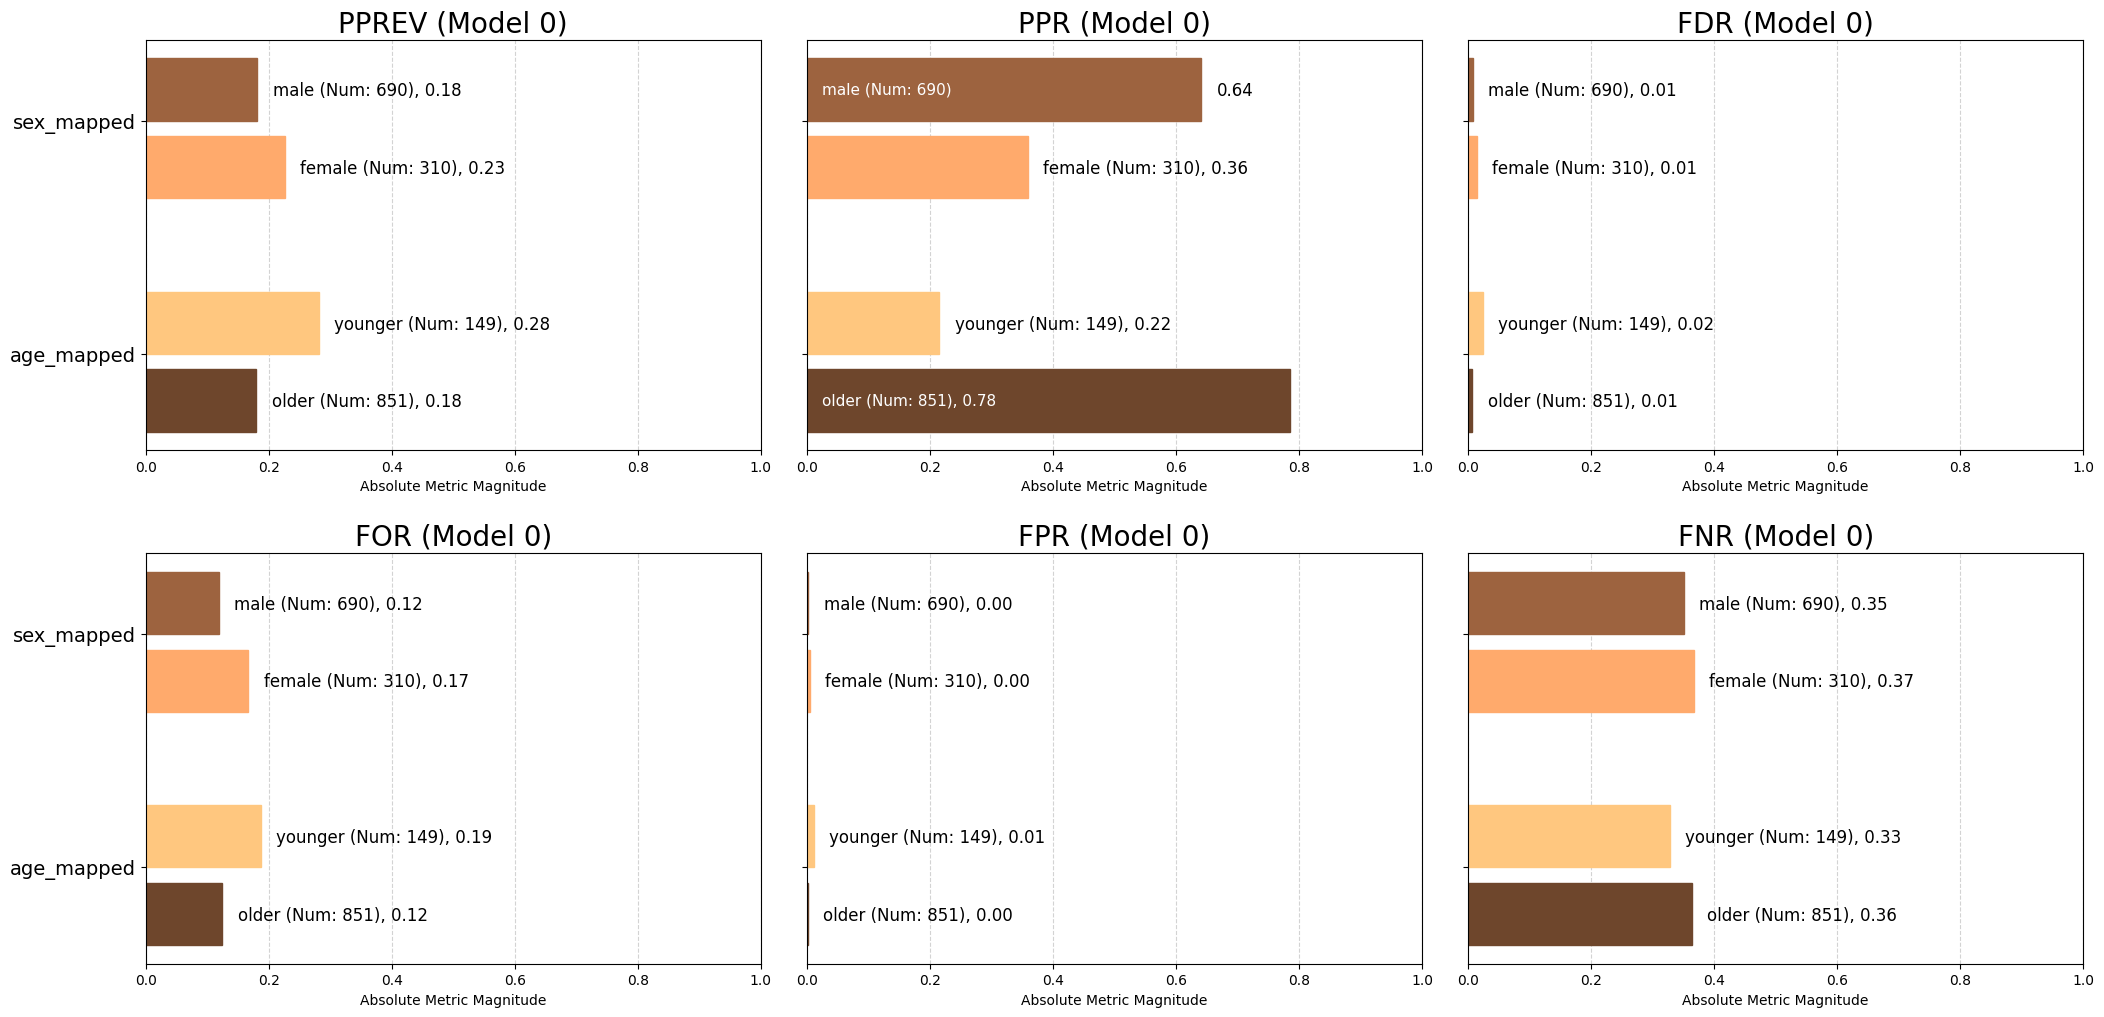

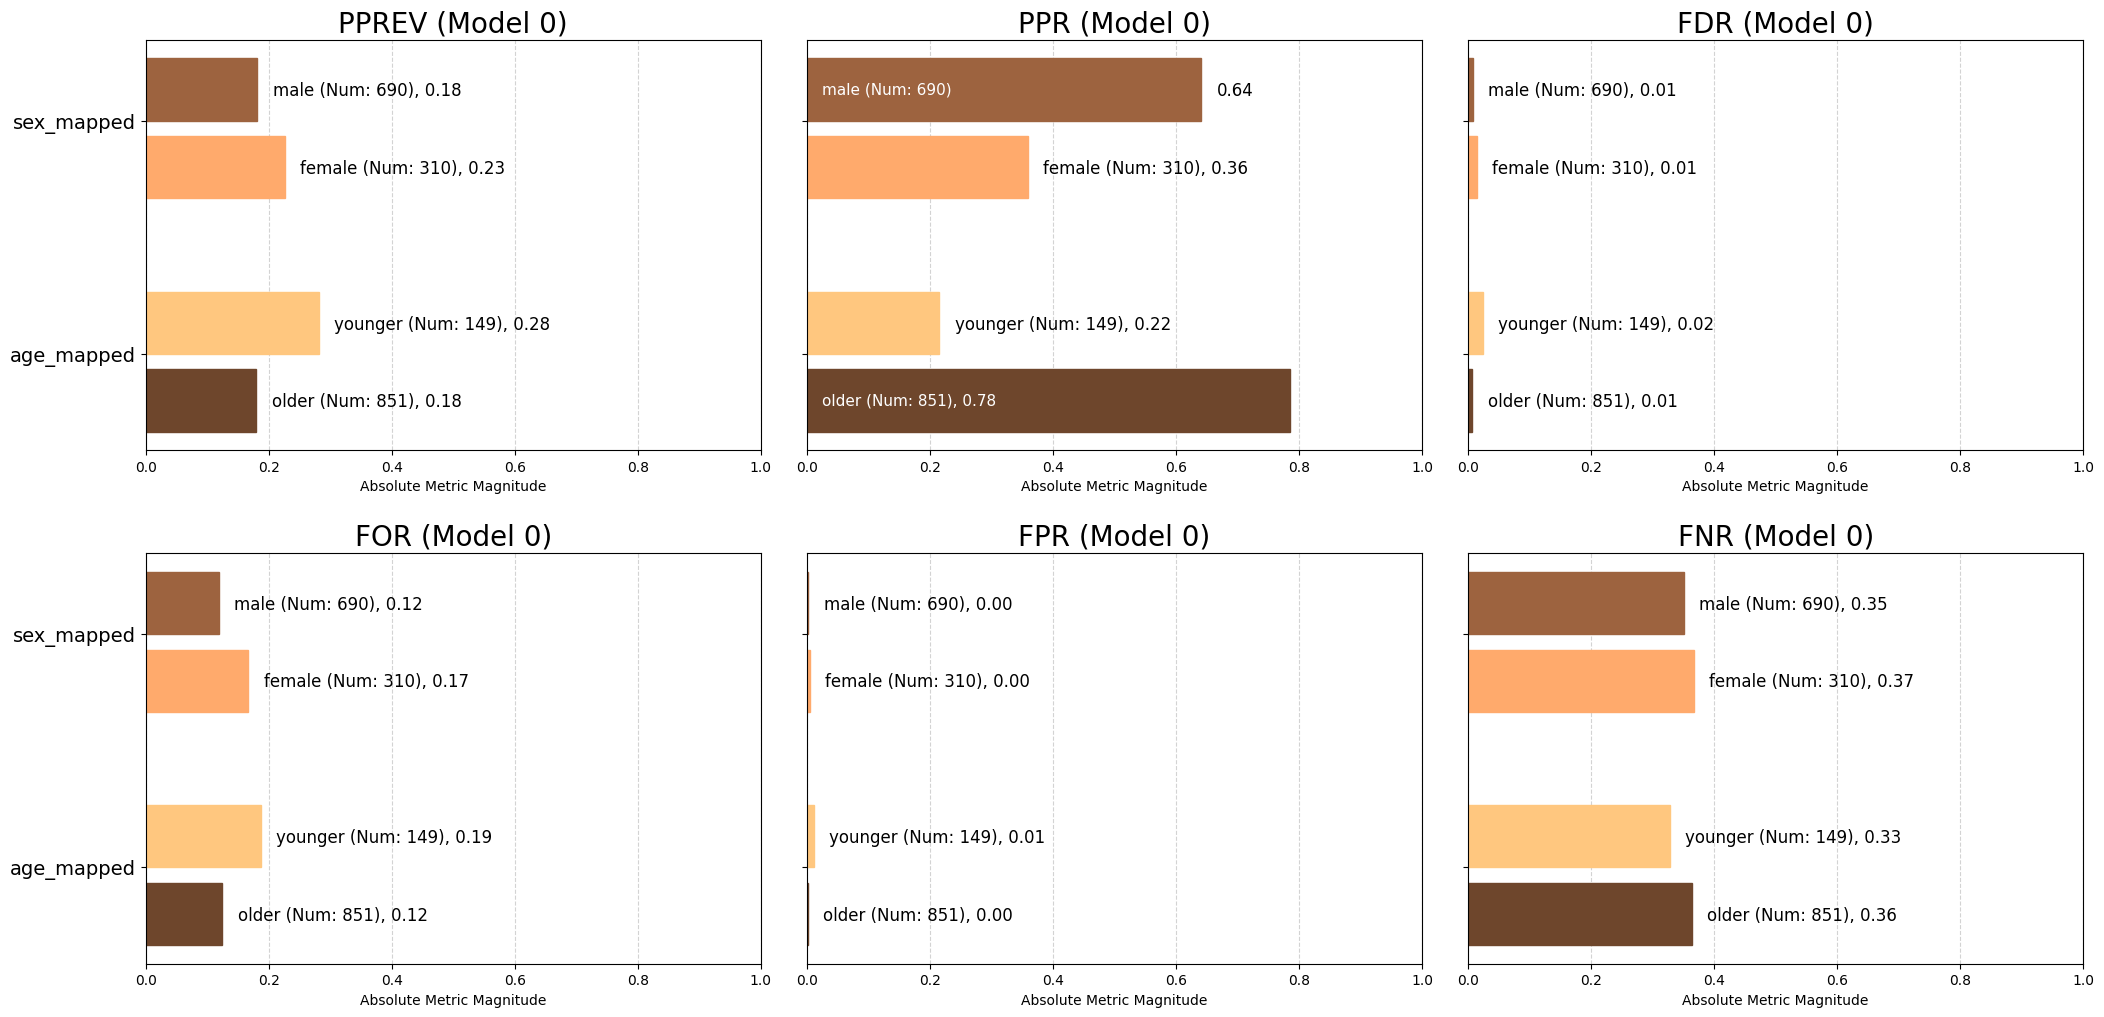

<Figure size 640x480 with 0 Axes>

In [42]:
from aequitas.plotting import Plot
plot = Plot()
plot.plot_group_metric_all(bdf)

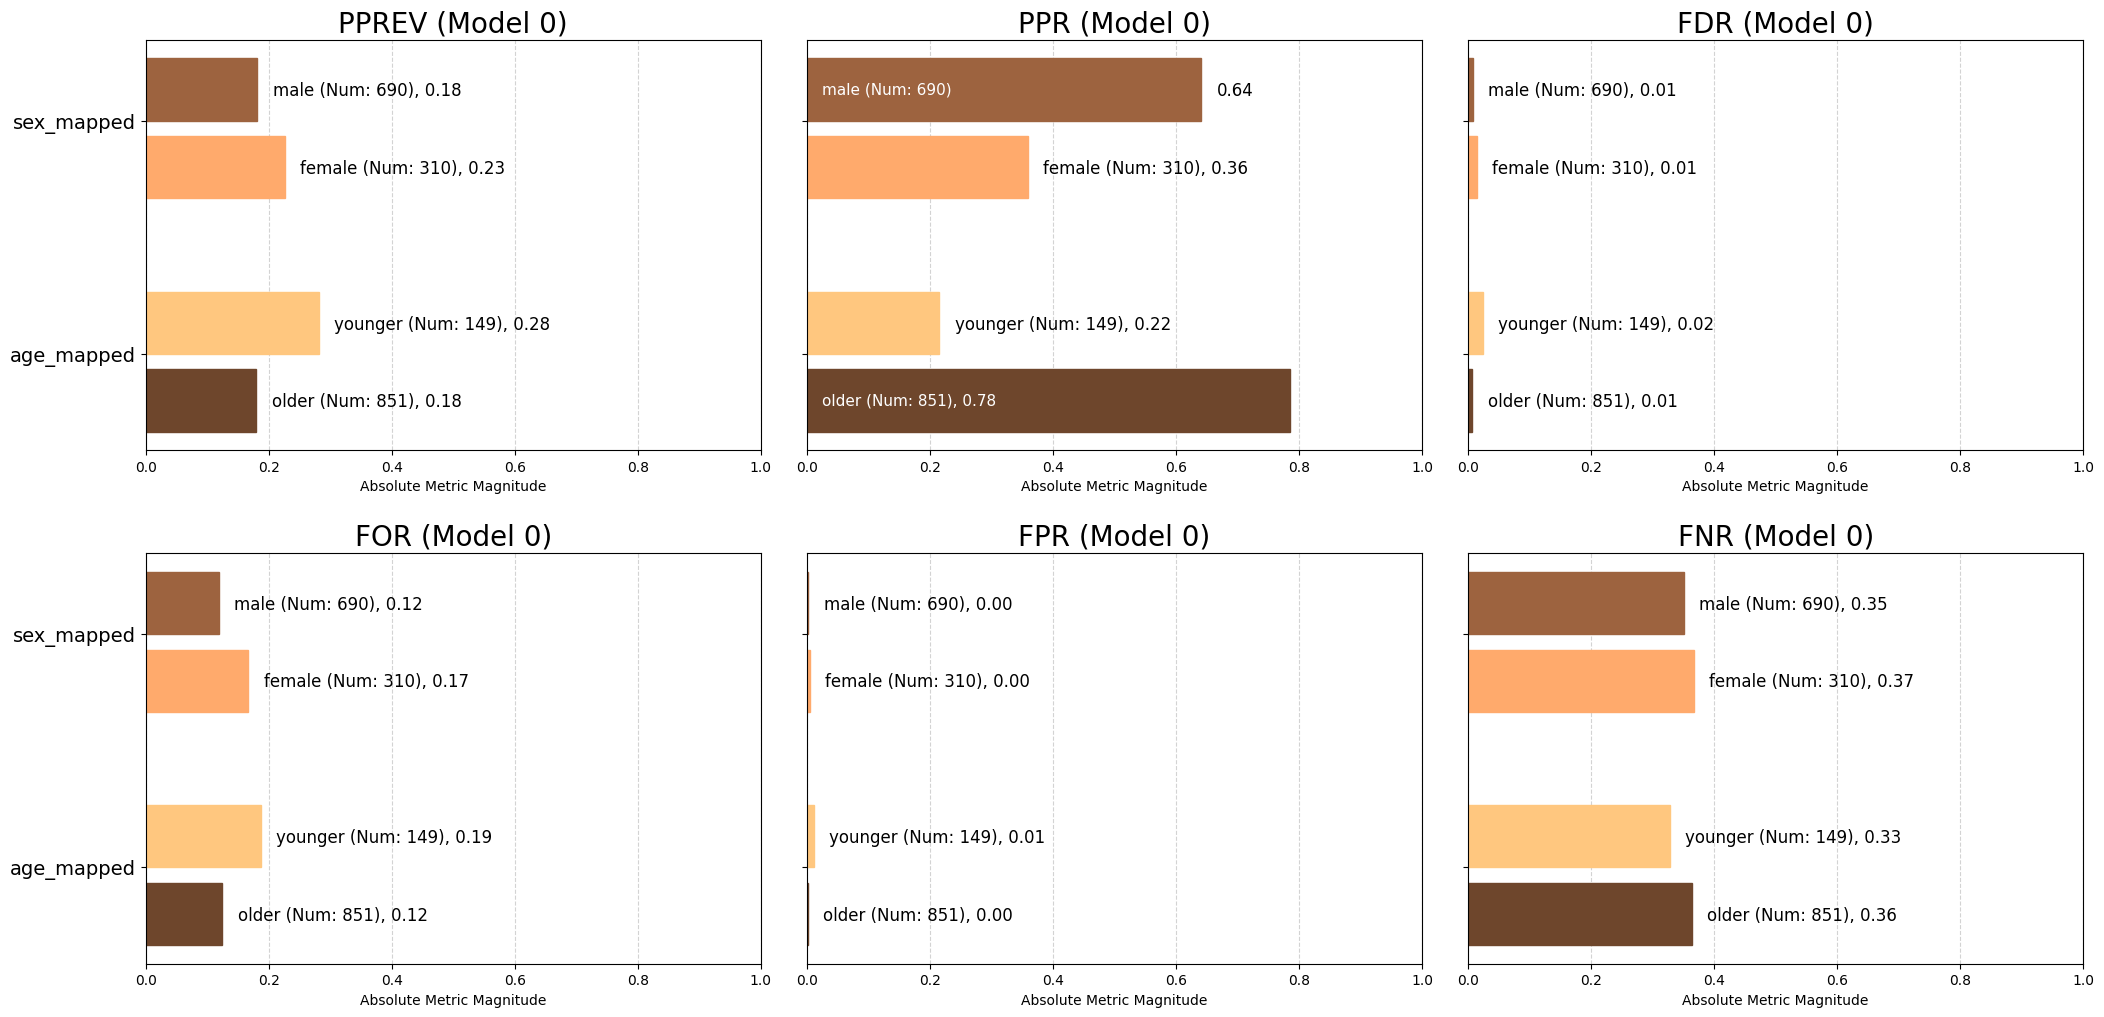

<Figure size 640x480 with 0 Axes>

In [44]:
from aequitas.plotting import Plot
import matplotlib.pyplot as plt

# Initialize the plot object
plot = Plot()

# Generate the plot
plot.plot_group_metric_all(bdf)

# Save the plot as an image file
plt.savefig('fairness_plot.png')

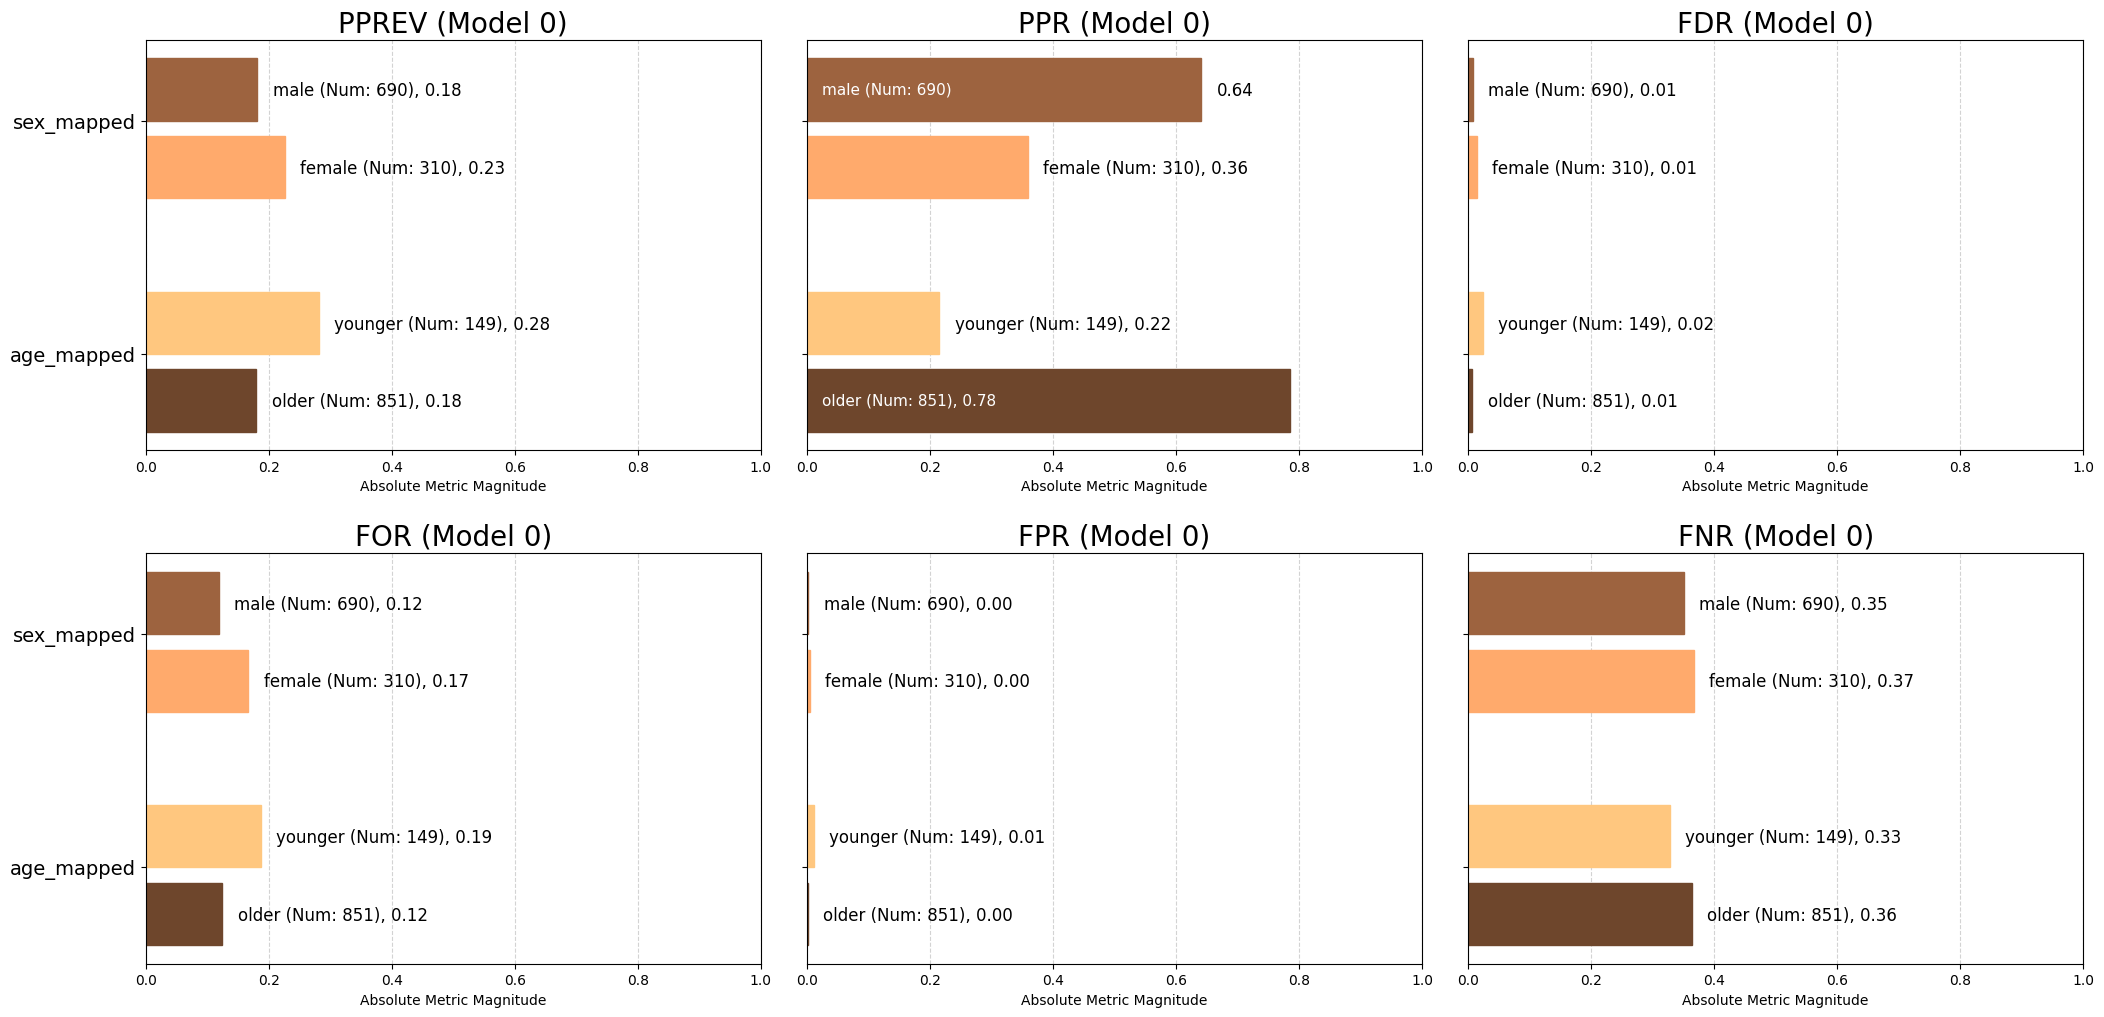

<Figure size 640x480 with 0 Axes>

In [45]:
from aequitas.plotting import Plot
import matplotlib.pyplot as plt

# Initialize plot object
plot = Plot()

# Plot group metrics for all fairness attributes
plot.plot_group_metric_all(bdf)

# Save the plot to a file
plt.savefig('fairness_metrics_visualization.png')

# Show the plot
plt.show()